In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector

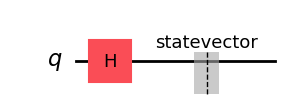

In [2]:
qc = QuantumCircuit(1)
qc.h(0)
qc.save_statevector()
qc.draw('mpl')

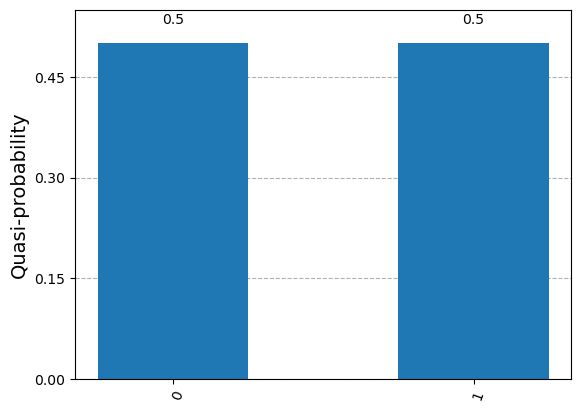

In [4]:
simulator = AerSimulator(method='statevector')
qcc = transpile(qc, simulator)
job = simulator.run(qcc,shots=1000)
plot_histogram(job.result().get_counts())

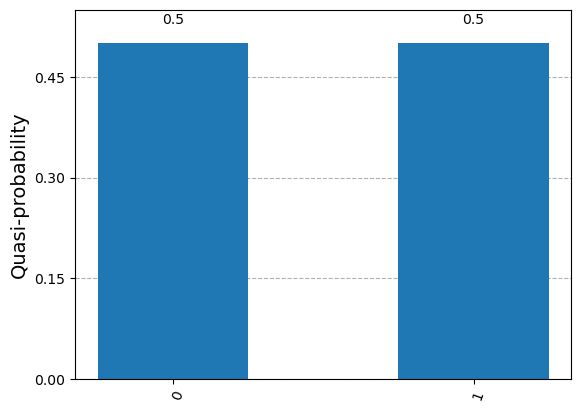

In [5]:
simulator = AerSimulator(method='statevector')
qcc = transpile(qc, simulator)
job = simulator.run(qcc,shots=1)
plot_histogram(job.result().get_counts())

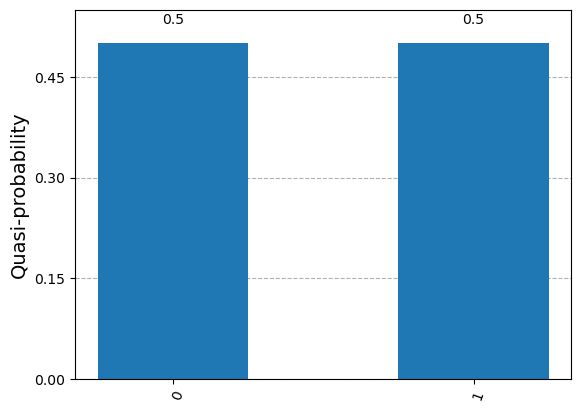

In [6]:
simulator = AerSimulator()
qcc = transpile(qc, simulator)
job = simulator.run(qcc,shots=1)
plot_histogram(job.result().get_counts())

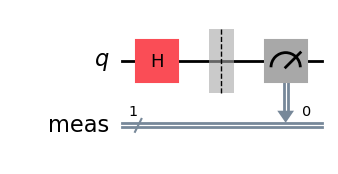

In [7]:
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()
qc.draw('mpl')

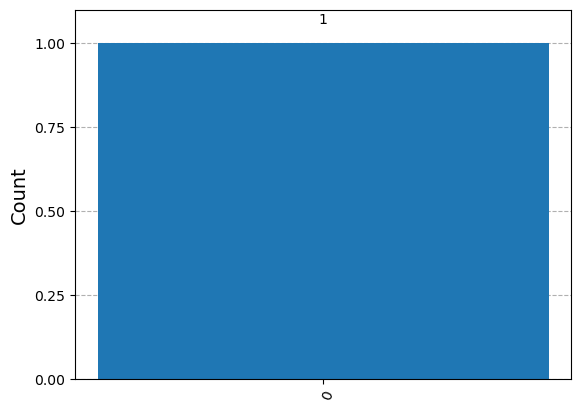

In [8]:
simulator = AerSimulator()
qcc = transpile(qc, simulator)
job = simulator.run(qcc,shots=1)
plot_histogram(job.result().get_counts())

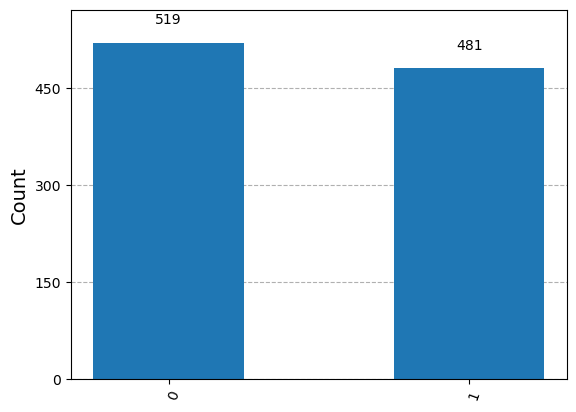

In [9]:
simulator = AerSimulator()
qcc = transpile(qc, simulator)
job = simulator.run(qcc,shots=1000)
plot_histogram(job.result().get_counts())

In [10]:
simulator = AerSimulator()
qcc = transpile(qc, simulator)
result = simulator.run(qcc,shots=10,memory=True).result()
memory = result.get_memory(qcc)
print(memory)

['1', '0', '1', '1', '0', '1', '0', '1', '1', '0']


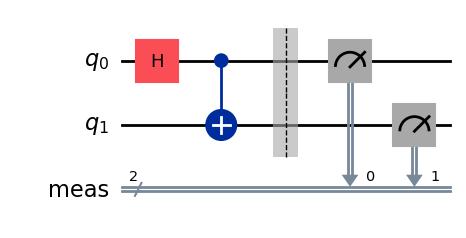

In [2]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
qc.draw('mpl')

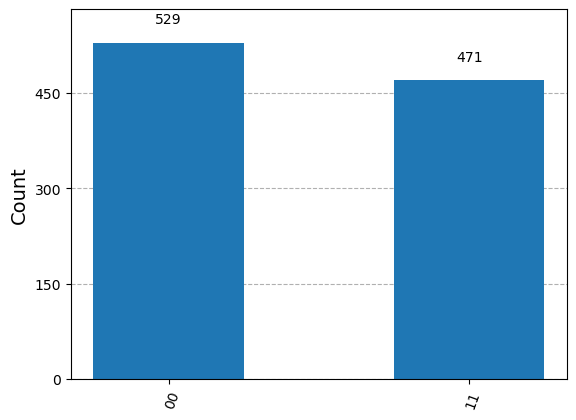

In [12]:
simulator = AerSimulator()
qcc = transpile(qc, simulator)
job = simulator.run(qcc,shots=1000)
plot_histogram(job.result().get_counts())

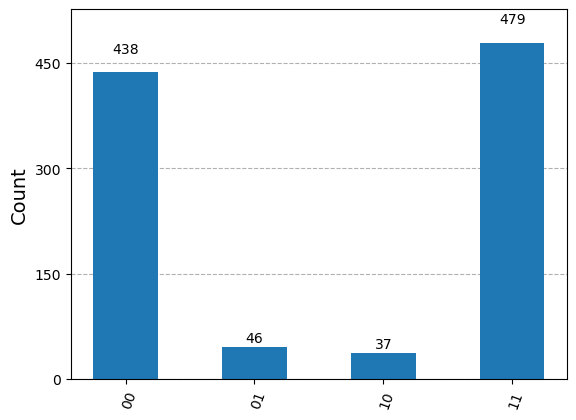

In [14]:
from qiskit_ibm_runtime.fake_provider import FakeBurlingtonV2
simulator = AerSimulator.from_backend(FakeBurlingtonV2())
qcc = transpile(qc, simulator)
job = simulator.run(qcc,shots=1000)
plot_histogram(job.result().get_counts())

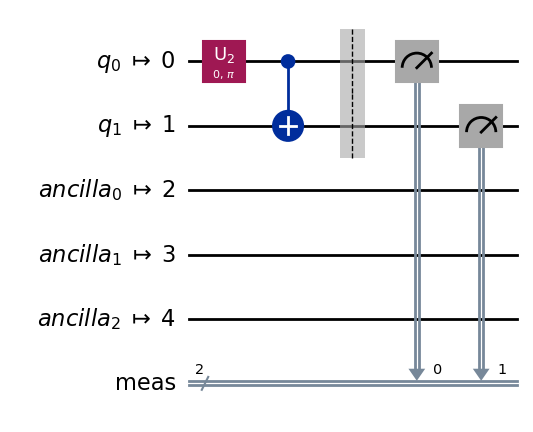

In [15]:
qcc.draw('mpl')

In [16]:
from qiskit_aer.noise import NoiseModel, ReadoutError, pauli_error

In [17]:
print(noise)

NoiseModel: Ideal


In [33]:
noise = NoiseModel()
p_error = 0.5
bit_flip = pauli_error([('X', p_error), ('I', 1 - p_error)])
bit_flip2 = bit_flip.tensor(bit_flip)
p_meas0 = 0.01
p_meas1 = 0.05
measure = ReadoutError([[1-p_meas0, p_meas0], [p_meas1, 1-p_meas1]])
noise.add_all_qubit_readout_error(measure)
noise.add_all_qubit_quantum_error(bit_flip, ["u1", "u2", "u3"])
noise.add_all_qubit_quantum_error(bit_flip2, ["cx"])
print(noise)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u1', 'u2', 'u3', 'measure', 'cx']
  All-qubits errors: ['u1', 'u2', 'u3', 'cx', 'measure']


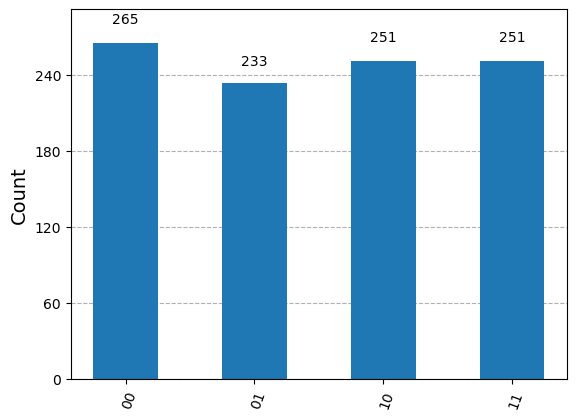

In [34]:
simulator = AerSimulator(noise_model=noise)
qcc = transpile(qc, simulator)
job = simulator.run(qcc,shots=1000)
plot_histogram(job.result().get_counts())

In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService

#QiskitRuntimeService.save_account(channel="ibm_quantum", token="...")

In [4]:
service = QiskitRuntimeService()
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>]

In [7]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler

backend = service.least_busy(
    operational=True, simulator=False, min_num_qubits=2
)

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)

sampler = Sampler(backend)
job = sampler.run([isa_circuit])
result = job.result()

{'00': 2080, '11': 1976, '01': 23, '10': 17}


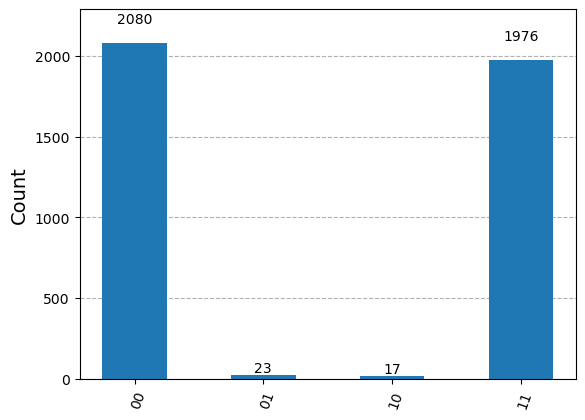

In [8]:
print(result[0].data.meas.get_counts())
plot_histogram(result[0].data.meas.get_counts())

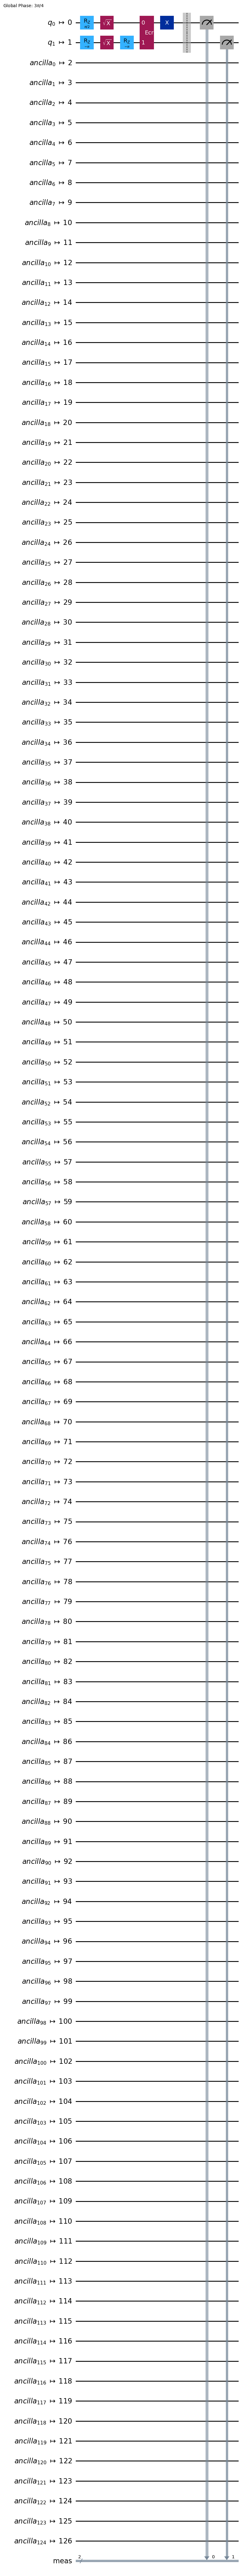

In [49]:
isa_circuit.draw('mpl')

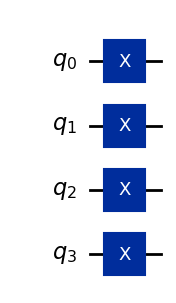

In [2]:
qc = QuantumCircuit(4)
qc.x(0)
qc.x(1)
qc.x(2)
qc.x(3)
qc.draw('mpl')

In [4]:
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import StatevectorEstimator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
 
estimator = StatevectorEstimator()
observable = SparsePauliOp(["ZIII", "IZII", "IIZI", "IIIZ"])
pm = generate_preset_pass_manager(optimization_level=1)
isa_circuit = pm.run(qc)
isa_observable = observable.apply_layout(isa_circuit.layout)
job = estimator.run([(isa_circuit, isa_observable)])
result = job.result()
print(result[0].data.evs)

-4.0
